In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import bartlett
import scipy.stats as stats
import colourmap
import plotly.express as px
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import statsmodels.api as sm
from sklearn.decomposition import PCA
from pca import pca
from sklearn.cluster import KMeans, SpectralClustering
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('my_data.csv')
df.head()

,product_name,brands,nutrition_grade_fr,energy_100g,additives_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Pizza au thon,Toupargel,C,1052.0,E160,13.5,3.2,21.7,3.2,1.9,9.9,1.200,0.472441,9.0
1,Soupe rustique aux légumes à l'italienne,Amy's kitchen,A,264.0,E14X,2.9,0.4,7.3,1.6,1.6,2.0,0.762,0.300000,-5.0
2,"Lasagnes aux légumes, pâtes de riz sans gluten",Amy's Kitchen,B,541.0,E14X,5.5,2.7,15.0,2.4,1.6,5.5,0.762,0.300000,1.0
3,"4 Steaks aux légumes, au quinoa et aux noix",Amy's Kitchen,C,510.0,E14X,4.2,0.0,18.0,2.8,1.8,3.8,1.524,0.600000,3.0
4,Kimchi / Chou chinois,Wang,C,168.0,E621,0.0,0.0,6.7,2.5,0.0,2.5,0.950,0.374016,9.0


In [4]:
df=df.rename(columns={'nutrition-score-fr_100g':'nutriscore_100g','saturated-fat_100g':'saturatedfat_100g'  })
df

,product_name,brands,nutrition_grade_fr,energy_100g,additives_fr,fat_100g,saturatedfat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_100g
0,Pizza au thon,Toupargel,C,1052.0,E160,13.5,3.2,21.7,3.2,1.9,9.9,1.2000,0.472441,9.0
1,Soupe rustique aux légumes à l'italienne,Amy's kitchen,A,264.0,E14X,2.9,0.4,7.3,1.6,1.6,2.0,0.7620,0.300000,-5.0
2,"Lasagnes aux légumes, pâtes de riz sans gluten",Amy's Kitchen,B,541.0,E14X,5.5,2.7,15.0,2.4,1.6,5.5,0.7620,0.300000,1.0
3,"4 Steaks aux légumes, au quinoa et aux noix",Amy's Kitchen,C,510.0,E14X,4.2,0.0,18.0,2.8,1.8,3.8,1.5240,0.600000,3.0
4,Kimchi / Chou chinois,Wang,C,168.0,E621,0.0,0.0,6.7,2.5,0.0,2.5,0.9500,0.374016,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,Soupe Légumes du potager moulinés,Knorr,B,130.0,E14X,1.0,0.6,5.0,0.9,0.8,1.5,0.7366,0.290000,2.0
4152,4 Ch'ticanos,Bakx Foods,D,814.0,E621,11.1,3.0,11.8,1.4,0.0,11.9,1.9000,0.748031,12.0
4153,2 Meunières Tradition,Iglo,B,432.0,E14X,0.7,0.2,8.9,0.4,0.4,14.8,1.1000,0.433071,0.0
4154,Samoussas au poulet,"Authentic Asia,Charoen Pokphand,CP",C,1120.0,E14X,14.7,3.3,2.0,1.6,3.0,9.1,1.1900,0.468504,7.0


### Analyses univariées

In [5]:
pd.crosstab(df['nutrition_grade_fr'], "freq")

col_0,freq
nutrition_grade_fr,
A,881
B,1273
C,1215
D,727
E,60


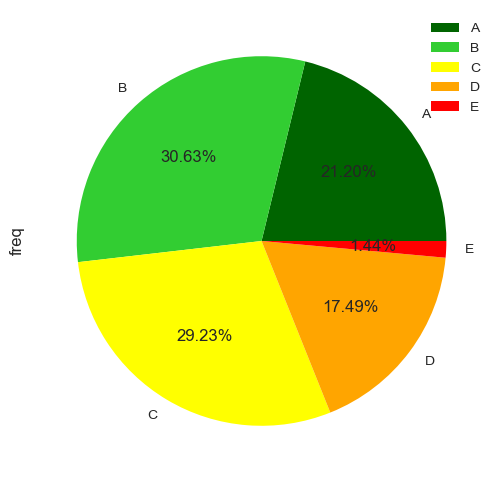

In [6]:
t=pd.crosstab(df['nutrition_grade_fr'], "freq")
t.plot.pie(subplots=True, figsize = (7,6), autopct="%.2f%%",colors = [ 'darkgreen','Limegreen' , 'yellow', 'orange','red' ]);

Il existe une répartition en pourcentage très claire des cinq  nutri-grades, les nutri-grades «**b** et **c**» représentant 59 % des plats cuisinées et la nutri-grade «**e** » représentant seulement 1,4 %.

In [7]:
X = df.select_dtypes(include = ['float64', 'int64'])
X.head()

,energy_100g,fat_100g,saturatedfat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_100g
0,1052.0,13.5,3.2,21.7,3.2,1.9,9.9,1.200,0.472441,9.0
1,264.0,2.9,0.4,7.3,1.6,1.6,2.0,0.762,0.300000,-5.0
2,541.0,5.5,2.7,15.0,2.4,1.6,5.5,0.762,0.300000,1.0
3,510.0,4.2,0.0,18.0,2.8,1.8,3.8,1.524,0.600000,3.0
4,168.0,0.0,0.0,6.7,2.5,0.0,2.5,0.950,0.374016,9.0


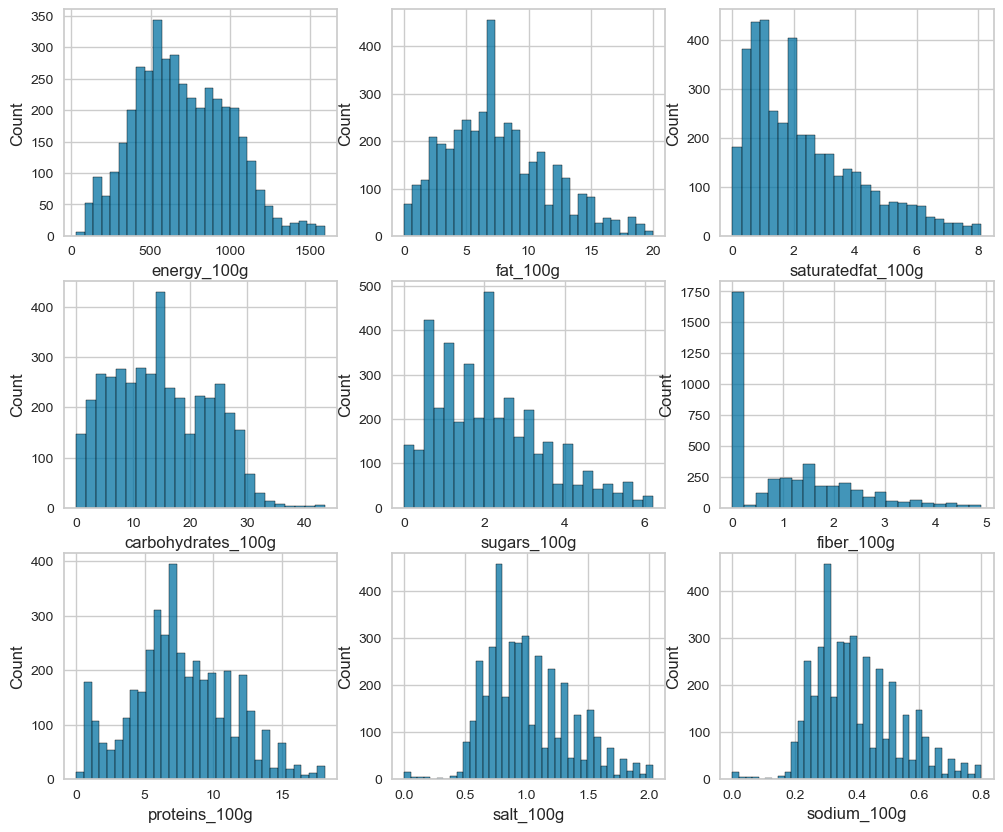

In [8]:
fig, axes = plt.subplots(3,3, figsize=(12,10))
sns.histplot(ax = axes[0,0],x=df["energy_100g"])
sns.histplot(ax = axes[0,1],x=df["fat_100g"])
sns.histplot(ax = axes[0,2],x=df["saturatedfat_100g"])
sns.histplot(ax = axes[1,0],x=df["carbohydrates_100g"])
sns.histplot(ax = axes[1,1],x=df["sugars_100g"])
sns.histplot(ax = axes[1,2],x=df["fiber_100g"])
sns.histplot(ax = axes[2,0],x=df["proteins_100g"])
sns.histplot(ax = axes[2,1],x=df["salt_100g"])
sns.histplot(ax = axes[2,2],x=df["sodium_100g"])
plt.show();

La forme des 6 histogrammes est non-symétrique, ce qui présage une non-normalité des données.

### Analyses bivariées

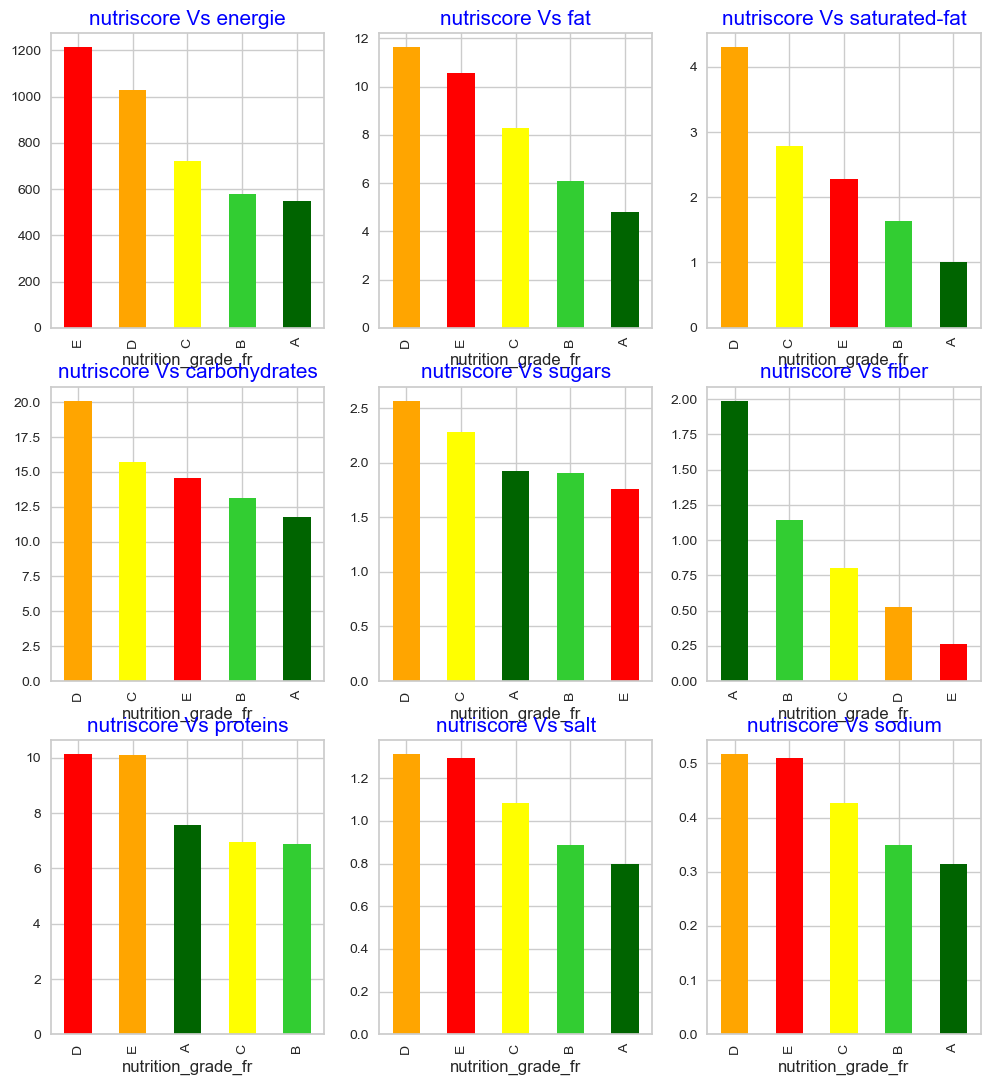

In [9]:
fig, axes = plt.subplots(3,3, figsize=(12,13))
df.groupby('nutrition_grade_fr')['energy_100g'].mean().sort_values(ascending=False).plot.bar(ax = axes[0,0], color= ('red','orange','yellow' ,'Limegreen','darkgreen')).set_title("nutriscore Vs energie",fontsize=15, color='blue')
df.groupby('nutrition_grade_fr')['fat_100g'].mean().sort_values(ascending=False).plot.bar(ax = axes[0,1], color= ('orange','red','yellow' ,'Limegreen','darkgreen')).set_title("nutriscore Vs fat",fontsize=15, color='blue')
df.groupby('nutrition_grade_fr')['saturatedfat_100g'].mean().sort_values(ascending=False).plot.bar(ax = axes[0,2], color= ('orange','yellow' ,'red','Limegreen','darkgreen')).set_title("nutriscore Vs saturated-fat",fontsize=15, color='blue')
df.groupby('nutrition_grade_fr')['carbohydrates_100g'].mean().sort_values(ascending=False).plot.bar(ax = axes[1,0], color= ('orange','yellow','red', 'Limegreen','darkgreen')).set_title("nutriscore Vs carbohydrates",fontsize=15, color='blue')
df.groupby('nutrition_grade_fr')['sugars_100g'].mean().sort_values(ascending=False).plot.bar(ax = axes[1,1], color= ('orange','yellow' ,'darkgreen','Limegreen', 'red')).set_title("nutriscore Vs sugars",fontsize=15, color='blue')
df.groupby('nutrition_grade_fr')['fiber_100g'].mean().sort_values(ascending=False).plot.bar(ax = axes[1,2], color= ('darkgreen','Limegreen','yellow','orange','red')).set_title("nutriscore Vs fiber",fontsize=15, color='blue')
df.groupby('nutrition_grade_fr')['proteins_100g'].mean().sort_values(ascending=False).plot.bar(ax = axes[2,0], color= ('red','orange','darkgreen','yellow' ,'Limegreen')).set_title("nutriscore Vs proteins",fontsize=15, color='blue')
df.groupby('nutrition_grade_fr')['salt_100g'].mean().sort_values(ascending=False).plot.bar(ax = axes[2,1], color= ('orange','red','yellow' ,'Limegreen','darkgreen')).set_title("nutriscore Vs salt",fontsize=15, color='blue')
df.groupby('nutrition_grade_fr')['sodium_100g'].mean().sort_values(ascending=False).plot.bar(ax = axes[2,2], color= ('orange','red','yellow' ,'Limegreen','darkgreen')).set_title("nutriscore Vs sodium",fontsize=15, color='blue')
plt.show();

1- L'analyse bivariée entre la variable catégorielle nutri-grade et différentes variables quantitatives nutritionnelles montre que les plats préparés classés dans la catégorie « **a** » ont un taux élevé en fibre et des taux faibles en graisses,en sucres et en calories.

2- Une teneur élevée en fibres est associée à une meilleure qualité nutritionnelle,tandis qu'une teneur élevée en graisses, nutrition-score, sel et sucre est associée à une moins bonne qualité nutritionnelle.

In [10]:
df.corr().round(3)

,energy_100g,fat_100g,saturatedfat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_100g
energy_100g,1.000,0.691,0.442,0.605,0.205,-0.150,0.582,0.444,0.444,0.517
fat_100g,0.691,1.000,0.556,0.270,0.111,-0.135,0.413,0.348,0.348,0.535
saturatedfat_100g,0.442,0.556,1.000,0.196,0.044,-0.123,0.330,0.240,0.240,0.638
carbohydrates_100g,0.605,0.270,0.196,1.000,0.347,-0.001,0.242,0.342,0.342,0.347
sugars_100g,0.205,0.111,0.044,0.347,1.000,0.073,-0.009,0.196,0.196,0.186
fiber_100g,-0.150,-0.135,-0.123,-0.001,0.073,1.000,-0.143,-0.055,-0.055,-0.314
proteins_100g,0.582,0.413,0.330,0.242,-0.009,-0.143,1.000,0.331,0.331,0.234
salt_100g,0.444,0.348,0.240,0.342,0.196,-0.055,0.331,1.000,1.000,0.505
sodium_100g,0.444,0.348,0.240,0.342,0.196,-0.055,0.331,1.000,1.000,0.505
nutriscore_100g,0.517,0.535,0.638,0.347,0.186,-0.314,0.234,0.505,0.505,1.000


le coefficient de corrélation de Pearson , qui est une mesure de l'association linéaire entre deux variables .

Il prend une valeur comprise entre -1 et 1 où :

-1 indique une corrélation linéaire parfaitement négative.

0 indique aucune corrélation linéaire.

1 indique une corrélation linéaire parfaitement positive.

Plus le coefficient de corrélation est éloigné de zéro, plus la relation entre les deux variables est forte.

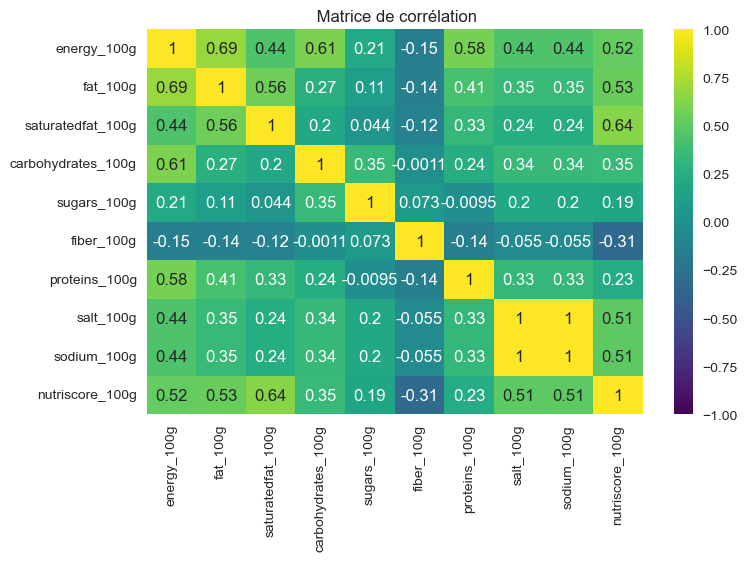

In [11]:
plt.figure(figsize=(8, 5)) 
sns.heatmap(X.corr(),annot = True,  vmin = -1, vmax = 1,cmap='viridis') 
plt.title(' Matrice de corrélation')
plt.show()

L'energy a une corrélation linéaire positive modérée avec :

- fat
- carbohydrates
- proteins
- salt

Fat a une corrélation linéaire positive modérée avec :

- proteins

et une corrélation linéaire positive faible avec:

 - salt 

Carbohydrates a une corrélation linéaire positive faible avec :

- salt 

Proteins a une corrélation linéaire positive faible avec :

- salt  

Les variables les plus fortement corrélées avec la variable nutriscore sont les calories, les graisses, le sel, les glucides.


## Analyses multivariées
(L'anova sera  réalisée à titre de démonstration)

Une ANOVA ("analyse de variance") est utilisée pour déterminer si oui ou non les moyennes des groupes sont indépendants ou plus sont égales.

Une ANOVA utilise les hypothèses nulles et alternatives suivantes :

    L' hypothèse nulle (H0 ou p_value > 0.05) indique qu'il n'y a pas de relation entre les variables étudiées (une variable     
    n'affecte pas l'autre). 

    L'hypothèse alternative (Ha, H1 ou p_value < 0.05) précise que au moins une moyenne d'un variable est différente des autres.
    
 Avant de pouvoir effectuer une ANOVA unidirectionnelle, nous devons d'abord vérifier que trois hypothèses sont remplies.

1. Normalité  : Chaque échantillon a été tiré d'une population distribuée normalement.

2. Variances égales : Les variances des populations dont proviennent les échantillons sont égales.

3. Indépendance  : Les observations de chaque groupe sont indépendantes les unes des autres et les observations au sein des  groupes  ont été obtenues par un échantillon aléatoire.


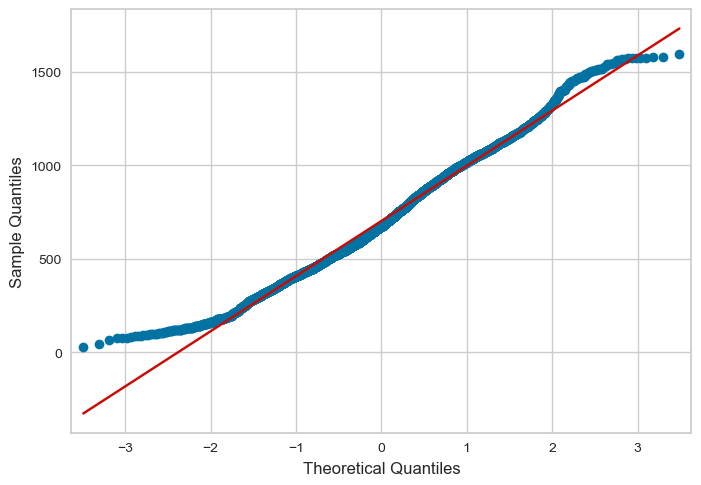

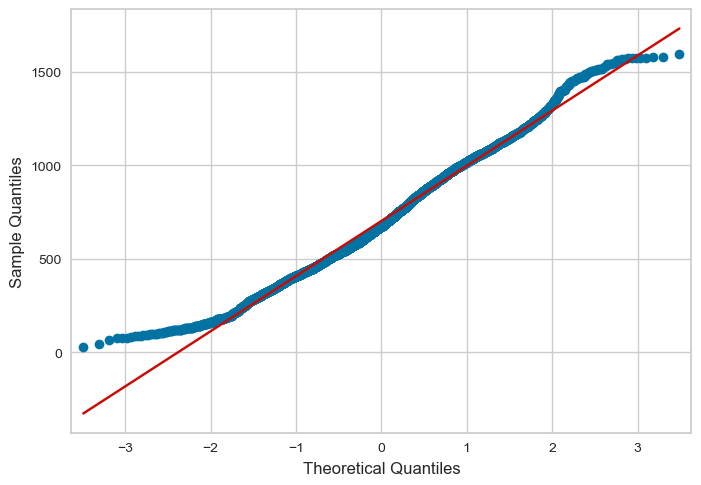

In [12]:
sm.qqplot(df['energy_100g'], line = "r")

nous pouvons voir qu'il y a un écart remarquable par rapport à la ligne le long des extrémités de queue, ce qui pourrait indiquer que les données ne sont pas distribuées normalement.

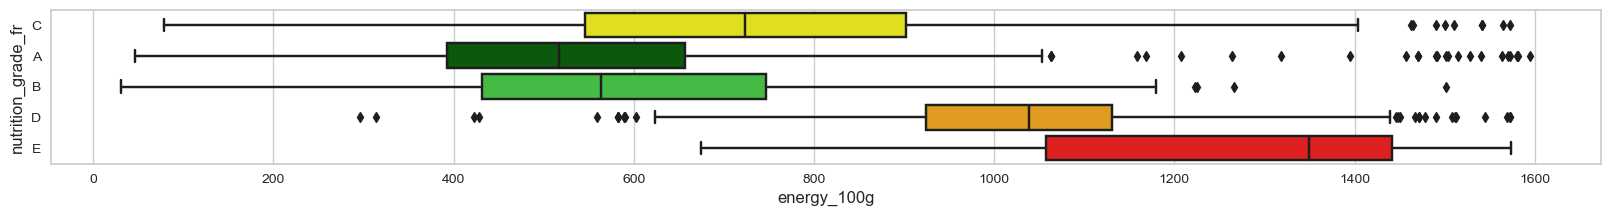

In [13]:
colors={'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'}
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x='energy_100g', y='nutrition_grade_fr', data=df, palette=colors)

In [14]:
# homogénéité des variances
bartlett(df.energy_100g[df['nutrition_grade_fr'] == 'A'],
        df.energy_100g[df['nutrition_grade_fr'] == 'B'],
        df.energy_100g[df['nutrition_grade_fr'] == 'C'],
        df.energy_100g[df['nutrition_grade_fr'] == 'D'],
        df.energy_100g[df['nutrition_grade_fr'] == 'E'],)

BartlettResult(statistic=125.47349023367863, pvalue=3.6154941611796593e-26)

Interprétation du test bartlett:

Ce test utilise les hypothèses nulles et alternatives suivantes :

    H0 :Les variances sont identiques.
    Ha :Au moins l'une des variances est différente d'une autre.
    
Si la pvalue est inférieure à un certain niveau de signification (α = 0,05), nous pouvons alors rejeter l'hypothèse nulle et conclure que tous les groupes n'ont pas la même variance.
    
Etant donné que la p-value calculée est inférieure au niveau de signification (α = 0,05), on doit rejeter l'hypothèse nulle H0,et retenir l'hypothèse alternative Ha.

Il n'est donc pas conseillé de réaliser une **ANOVA** car les résultats ne seraient pas fiables.


In [15]:
from scipy.stats import f_oneway
f_oneway( df['energy_100g'],df['proteins_100g'] )

F_onewayResult(statistic=22918.181883808786, pvalue=0.0)

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('energy_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,1.335723e+08,4.0,602.753912,0.0
Residual,2.299689e+08,4151.0,NaN,NaN


On a p-valeur trop faible, on rejette H0 et ce rejet est significatif. On peut donc affirmer, avec un faible risque de se tromper, qu’au moins deux moyennes diffèrent.
 
Autrement dit, Il y a une influence du **energy_100g** sur nutrition_grade_fr, et cette influence est significative.

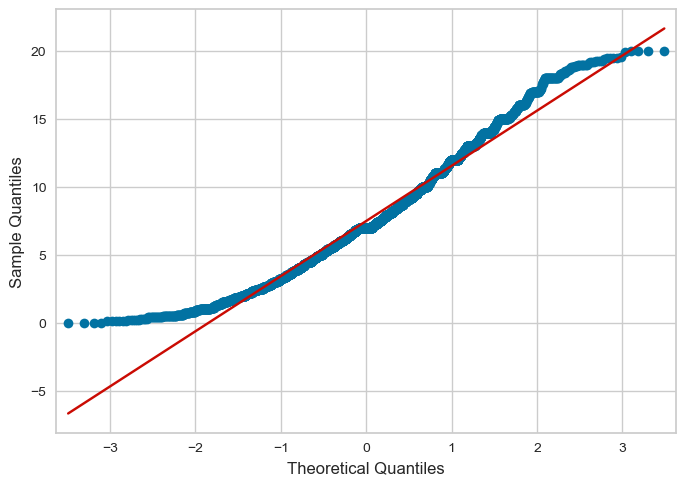

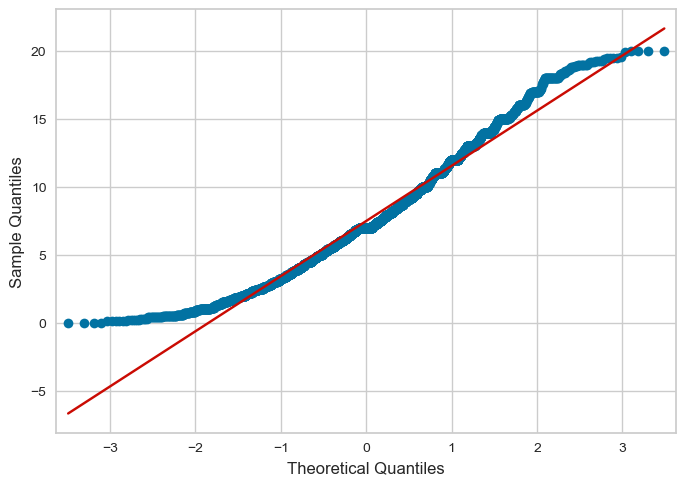

In [17]:
sm.qqplot(df['fat_100g'], line = "r")

Nous pouvons voir qu'il y a un écart remarquable par rapport à la ligne le long des extrémités de queue, ce qui pourrait indiquer que les données ne sont pas distribuées normalement.

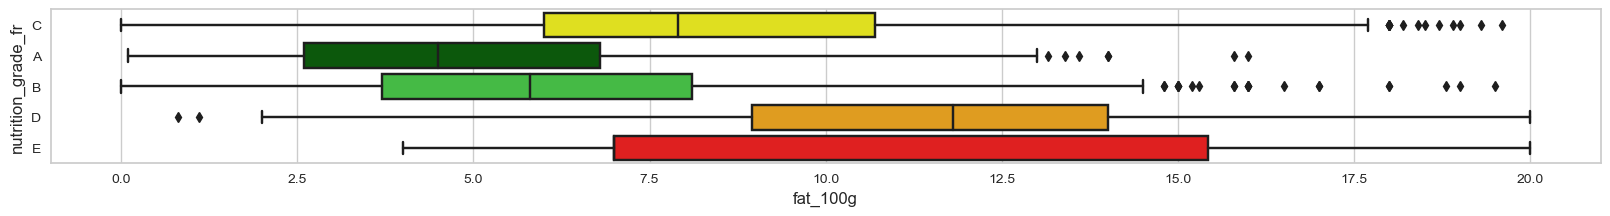

In [18]:
colors={'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'}
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x="fat_100g", y='nutrition_grade_fr', data=df, palette=colors)

In [19]:
# homogénéité des variances
bartlett(df.fat_100g[df['nutrition_grade_fr'] == 'A'],
        df.fat_100g[df['nutrition_grade_fr'] == 'B'],
        df.fat_100g[df['nutrition_grade_fr'] == 'C'],
        df.fat_100g[df['nutrition_grade_fr'] == 'D'],
        df.fat_100g[df['nutrition_grade_fr'] == 'E'],)

BartlettResult(statistic=96.59689126430484, pvalue=5.2129649360960866e-20)

Interprétation du test bartlett:

Ce test utilise les hypothèses nulles et alternatives suivantes :

    H0 :Les variances sont identiques.
    Ha :Au moins l'une des variances est différente d'une autre.
    
Si la pvalue est inférieure à un certain niveau de signification (α = 0,05), nous pouvons alors rejeter l'hypothèse nulle et conclure que tous les groupes n'ont pas la même variance.

Etant donné que la p-value calculée est inférieure au niveau de signification (α = 0,05), on doit rejeter l'hypothèse nulle H0,et retenir l'hypothèse alternative Ha.

Il n'est donc pas conseillé de réaliser une **ANOVA** car les résultats ne seraient pas fiables.

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('fat_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,22659.465756,4.0,495.12934,0.0
Residual,47492.359488,4151.0,NaN,NaN


 On a p-valeur trop faible, on rejette H0 et ce rejet est significatif. On peut donc affirmer, avec un faible risque de se tromper, qu’au moins deux moyennes diffèrent.

Autrement dit,Il y a une influence du **fat_100g** sur **nutrition_grade_fr**, et cette influence est significative.

In [21]:
bartlett(df.carbohydrates_100g[df['nutrition_grade_fr'] == 'A'],
        df.carbohydrates_100g[df['nutrition_grade_fr'] == 'B'],
        df.carbohydrates_100g[df['nutrition_grade_fr'] == 'C'],
        df.carbohydrates_100g[df['nutrition_grade_fr'] == 'D'],
        df.carbohydrates_100g[df['nutrition_grade_fr'] == 'E'],)

BartlettResult(statistic=76.2559263554309, pvalue=1.080744979705004e-15)

nterprétation du test bartlett:

Ce test utilise les hypothèses nulles et alternatives suivantes :

H0 :Les variances sont identiques.
Ha :Au moins l'une des variances est différente d'une autre.

Si la pvalue est inférieure à un certain niveau de signification (α = 0,05), nous pouvons alors rejeter l'hypothèse nulle et conclure que tous les groupes n'ont pas la même variance.

Etant donné que la p-value calculée est inférieure au niveau de signification (α = 0,05), on doit rejeter l'hypothèse nulle H0,et retenir l'hypothèse alternative Ha.

Il n'est donc pas conseillé de réaliser une ANOVA car les résultats ne seraient pas fiables.

In [22]:
model = ols('carbohydrates_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,33102.155627,4.0,130.23778,6.289127e-105
Residual,263761.882014,4151.0,NaN,NaN


On a p-valeur = 3.244130e-119 , on rejette H0 et ce rejet est significatif. On peut donc affirmer, avec un faible risque de se tromper, qu’au moins deux moyennes diffèrent.

Autrement dit,Il y a une influence du **carbohydrates_100g** sur **nutrition_grade_fr**, et cette influence est significative.

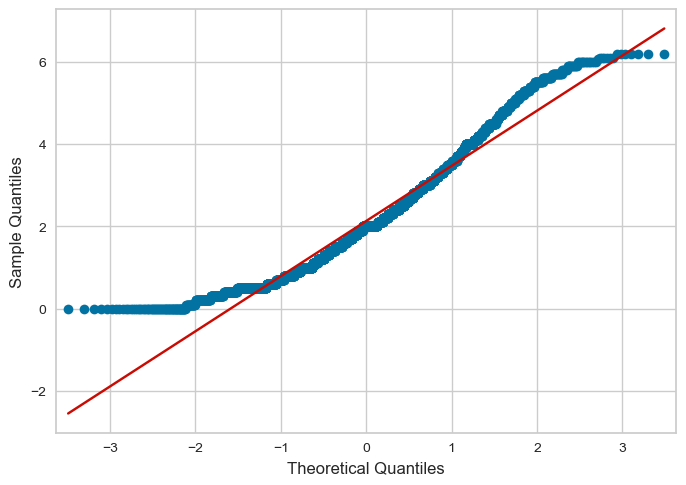

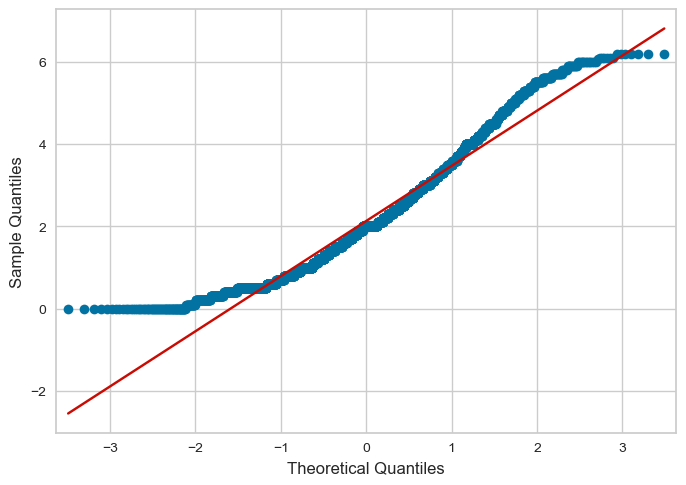

In [23]:
sm.qqplot(df['sugars_100g'], line = "r")

Nous pouvons voir qu'il y a un écart remarquable par rapport à la ligne le long des extrémités de queue, ce qui pourrait indiquer que les données ne sont pas distribuées normalement.

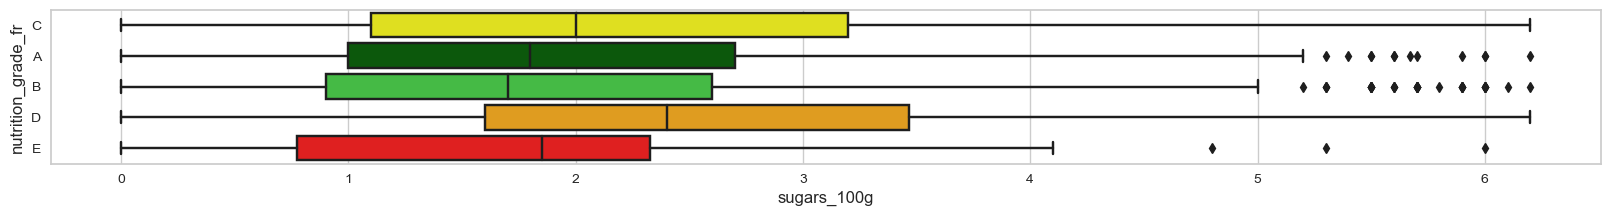

In [24]:
colors={'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'}
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x="sugars_100g", y='nutrition_grade_fr', data=df, palette=colors)

In [25]:
bartlett(df.sugars_100g[df['nutrition_grade_fr'] == 'A'],
        df.sugars_100g[df['nutrition_grade_fr'] == 'B'],
        df.sugars_100g[df['nutrition_grade_fr'] == 'C'],
        df.sugars_100g[df['nutrition_grade_fr'] == 'D'],
        df.sugars_100g[df['nutrition_grade_fr'] == 'E'],)

BartlettResult(statistic=42.24031619755708, pvalue=1.4873737325070963e-08)

Interprétation du test bartlett:

Ce test utilise les hypothèses nulles et alternatives suivantes :

    H0 :Les variances sont identiques.
    Ha :Au moins l'une des variances est différente d'une autre.

Si la pvalue est inférieure à un certain niveau de signification (α = 0,05), nous pouvons alors rejeter l'hypothèse nulle et conclure que tous les groupes n'ont pas la même variance.

Etant donné que la p-value calculée est inférieure au niveau de signification (α = 0,05), on doit rejeter l'hypothèse nulle H0,et retenir l'hypothèse alternative Ha.

Il n'est donc pas conseillé de réaliser une **ANOVA** car les résultats ne seraient pas fiables.


In [26]:
model = ols('sugars_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,278.194926,4.0,38.323146,1.539651e-31
Residual,7533.222550,4151.0,NaN,NaN


 On a p-valeur = 7.896915e-33 , on rejette H0 et ce rejet est significatif. On peut donc affirmer, avec un faible risque de se tromper, qu’au moins deux moyennes diffèrent.

Autrement dit,Il y a une influence du **sugars_100g** sur **nutrition_grade_fr**, et cette influence est significative.

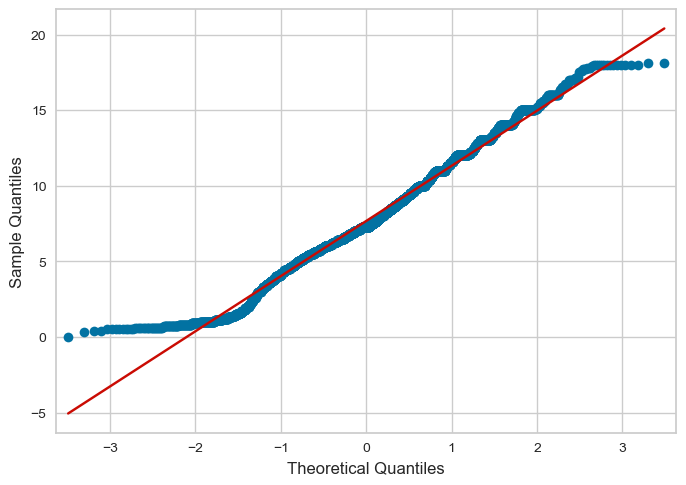

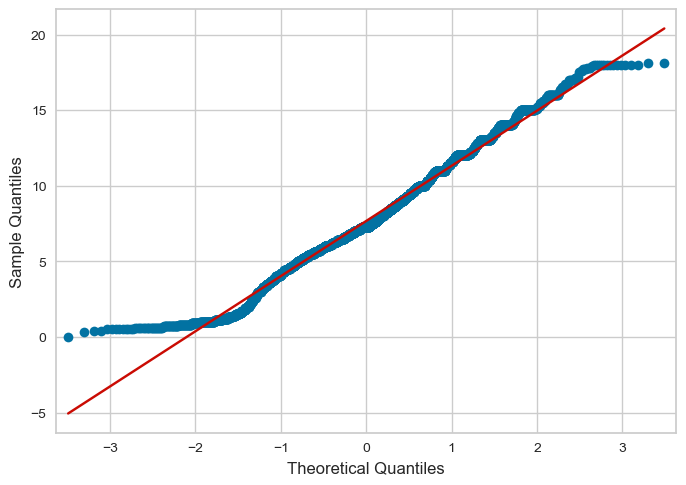

In [27]:
sm.qqplot(df['proteins_100g'], line = "r")

Nous pouvons voir qu'il y a un écart remarquable par rapport à la ligne le long des extrémités de queue, ce qui pourrait indiquer que les données ne sont pas distribuées normalement.

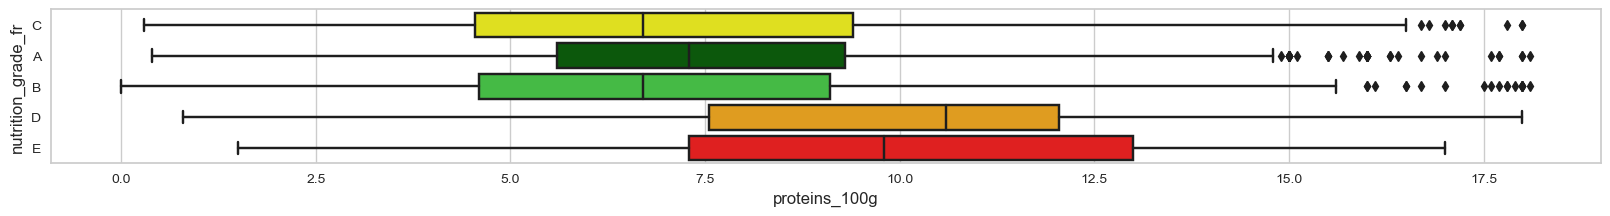

In [28]:
colors={'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'}
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x="proteins_100g", y='nutrition_grade_fr', data=df, palette=colors)

In [29]:
bartlett(df.proteins_100g[df['nutrition_grade_fr'] == 'A'],
        df.proteins_100g[df['nutrition_grade_fr'] == 'B'],
        df.proteins_100g[df['nutrition_grade_fr'] == 'C'],
        df.proteins_100g[df['nutrition_grade_fr'] == 'D'],
        df.proteins_100g[df['nutrition_grade_fr'] == 'E'],)

BartlettResult(statistic=32.98800472366903, pvalue=1.201254342326362e-06)

Interprétation du test bartlett:

Ce test utilise les hypothèses nulles et alternatives suivantes :

    H0 :Les variances sont identiques.
    Ha :Au moins l'une des variances est différente d'une autre.

Si la pvalue est inférieure à un certain niveau de signification (α = 0,05), nous pouvons alors rejeter l'hypothèse nulle et conclure que tous les groupes n'ont pas la même variance.

Etant donné que la p-value calculée est inférieure au niveau de signification (α = 0,05), on doit rejeter l'hypothèse nulle H0,et retenir l'hypothèse alternative Ha.

Il n'est donc pas conseillé de réaliser une **ANOVA** car les résultats ne seraient pas fiables.

In [30]:
model = ols('proteins_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,6205.991442,4.0,130.075618,8.380440e-105
Residual,49511.720402,4151.0,NaN,NaN


On a p-valeur = 2.561297e-111 , on rejette H0 et ce rejet est significatif. On peut donc affirmer, avec un faible risque de se tromper, qu’au moins deux moyennes diffèrent.

Autrement dit,Il y a une influence du **proteins_100g** sur **nutrition_grade_fr**, et cette influence est significative.

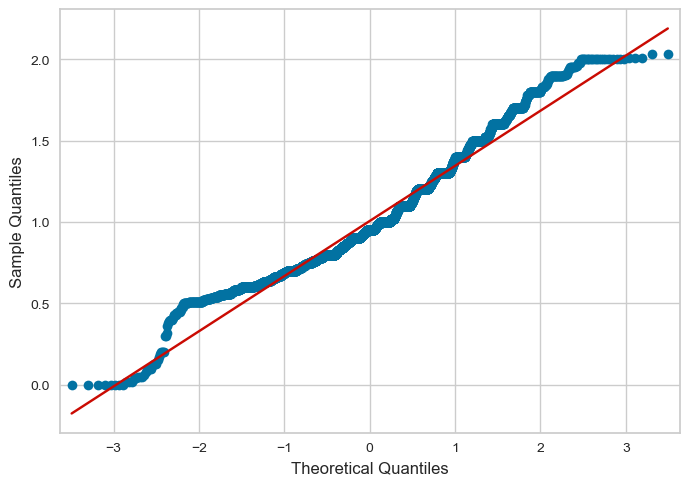

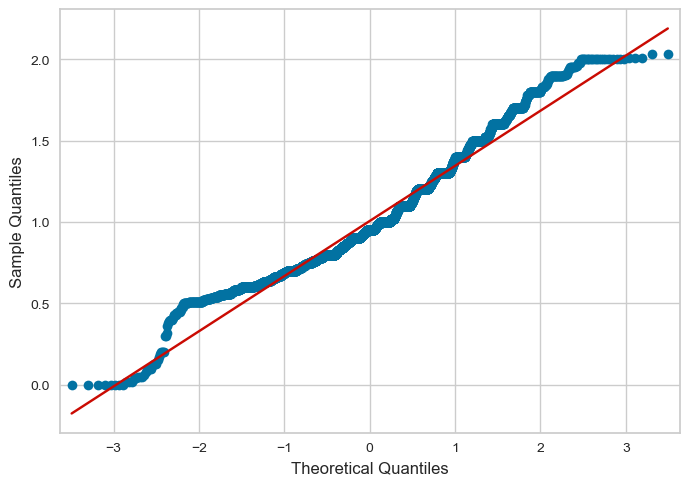

In [31]:
sm.qqplot(df['salt_100g'], line = "r")

Nous pouvons voir qu'il y a un écart remarquable par rapport à la ligne le long des extrémités de queue, ce qui pourrait indiquer que les données ne sont pas distribuées normalement.

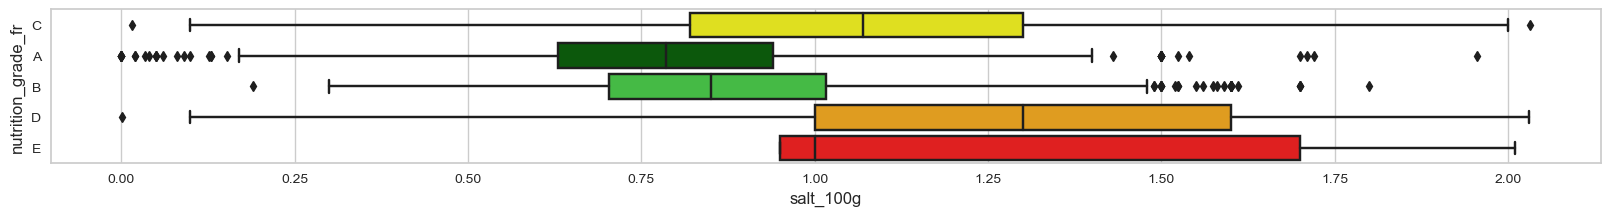

In [32]:
colors=colors={'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'}
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x="salt_100g", y='nutrition_grade_fr', data=df, palette=colors)

In [33]:
bartlett(df.salt_100g[df['nutrition_grade_fr'] == 'A'],
        df.salt_100g[df['nutrition_grade_fr'] == 'B'],
        df.salt_100g[df['nutrition_grade_fr'] == 'C'],
        df.salt_100g[df['nutrition_grade_fr'] == 'D'],
        df.salt_100g[df['nutrition_grade_fr'] == 'E'],)

BartlettResult(statistic=194.4157816070172, pvalue=5.960680043305692e-41)

Interprétation du test bartlett:

Ce test utilise les hypothèses nulles et alternatives suivantes :

    H0 :Les variances sont identiques.
    Ha :Au moins l'une des variances est différente d'une autre.

Si la pvalue est inférieure à un certain niveau de signification (α = 0,05), nous pouvons alors rejeter l'hypothèse nulle et conclure que tous les groupes n'ont pas la même variance.

Etant donné que la p-value calculée est inférieure au niveau de signification (α = 0,05), on doit rejeter l'hypothèse nulle H0,et retenir l'hypothèse alternative Ha.

Il n'est donc pas conseillé de réaliser une **ANOVA** car les résultats ne seraient pas fiables.


In [34]:
model = ols('salt_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,137.453554,4.0,401.487522,9.119070e-293
Residual,355.284829,4151.0,NaN,NaN


On a p-valeur trop faible , on rejette H0 et ce rejet est significatif. On peut donc affirmer, avec un faible risque de se tromper, qu’au moins deux moyennes diffèrent.

Autrement dit,Il y a une influence du **salt_100g** sur **nutrition_grade_fr**, et cette influence est significative.

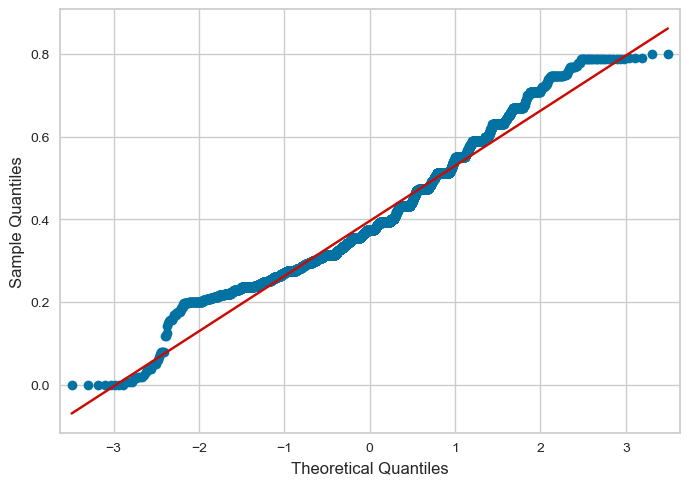

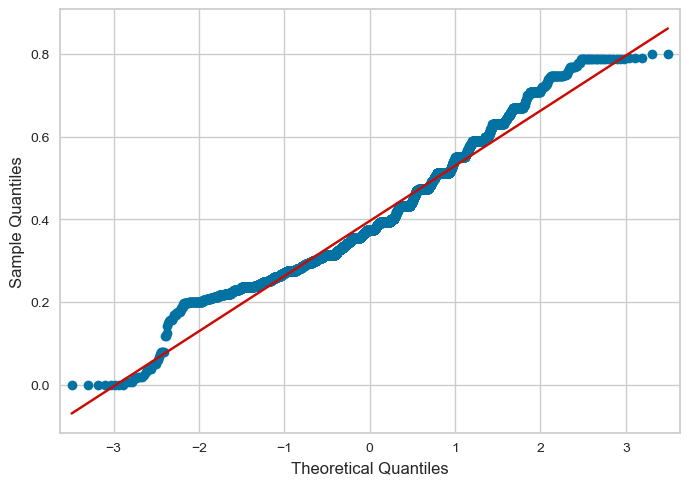

In [35]:
sm.qqplot(df['sodium_100g'], line = "r")

Nous pouvons voir qu'il y a un écart remarquable par rapport à la ligne le long des extrémités de queue, ce qui pourrait indiquer que les données ne sont pas distribuées normalement.

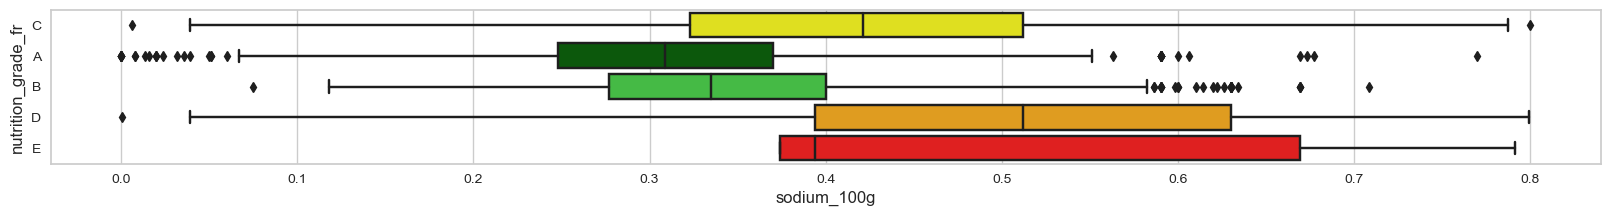

In [36]:
colors={'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'}
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x="sodium_100g", y='nutrition_grade_fr', data=df, palette=colors)

In [37]:
bartlett(df.sodium_100g[df['nutrition_grade_fr'] == 'A'],
        df.sodium_100g[df['nutrition_grade_fr'] == 'B'],
        df.sodium_100g[df['nutrition_grade_fr'] == 'C'],
        df.sodium_100g[df['nutrition_grade_fr'] == 'C'],
        df.sodium_100g[df['nutrition_grade_fr'] == 'E'],)

BartlettResult(statistic=184.9277172791365, pvalue=6.517786406940244e-39)

Interprétation du test bartlett:

Ce test utilise les hypothèses nulles et alternatives suivantes :

    H0 :Les variances sont identiques.
    Ha :Au moins l'une des variances est différente d'une autre.

Si la pvalue est inférieure à un certain niveau de signification (α = 0,05), nous pouvons alors rejeter l'hypothèse nulle et conclure que tous les groupes n'ont pas la même variance.

Etant donné que la p-value calculée est inférieure au niveau de signification (α = 0,05), on doit rejeter l'hypothèse nulle H0,et retenir l'hypothèse alternative Ha.

Il n'est donc pas conseillé de réaliser une **ANOVA** car les résultats ne seraient pas fiables.

In [38]:
model = ols('sodium_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,21.306065,4.0,401.478051,9.244312e-293
Residual,55.072422,4151.0,NaN,NaN


On a p-valeur est trop faible , on rejette H0 et ce rejet est significatif. On peut donc affirmer, avec un faible risque de se tromper, qu’au moins deux moyennes diffèrent.

Autrement dit,Il y a une influence du **sodium_100g** sur **nutrition_grade_fr**, et cette influence est significative.

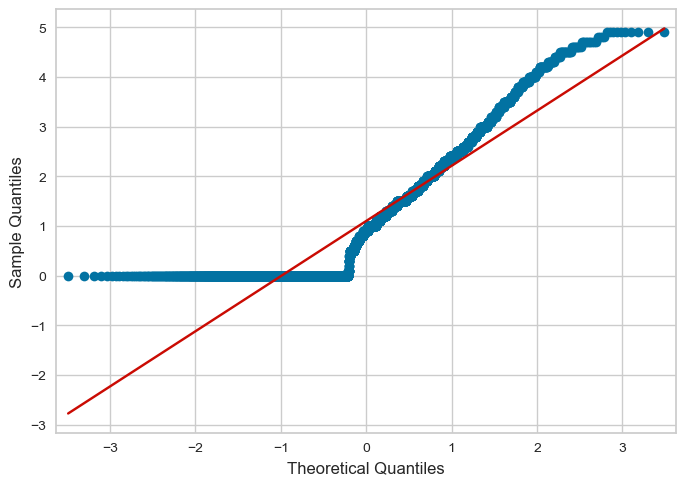

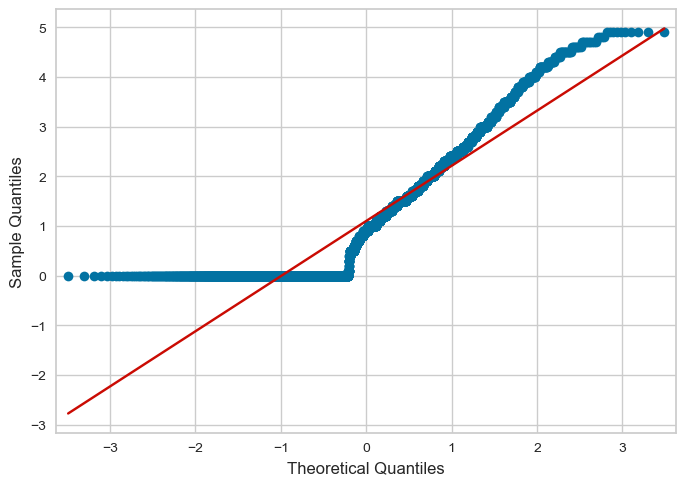

In [39]:
sm.qqplot(df['fiber_100g'], line = "r")

nous pouvons voir qu'il y a un écart remarquable par rapport à la ligne le long des extrémités de queue, ce qui pourrait indiquer que les données ne sont pas distribuées normalement.

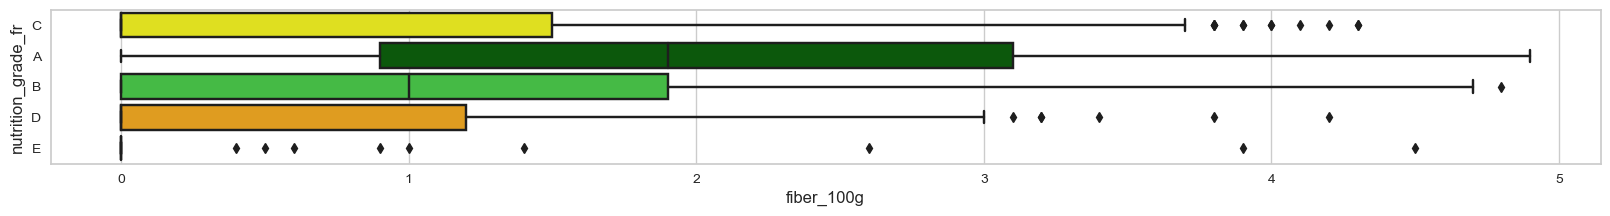

In [40]:
colors={'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'}
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x="fiber_100g", y='nutrition_grade_fr', data=df, palette=colors)

In [41]:
bartlett(df.fiber_100g[df['nutrition_grade_fr'] == 'A'],
        df.fiber_100g[df['nutrition_grade_fr'] == 'B'],
        df.fiber_100g[df['nutrition_grade_fr'] == 'C'],
        df.fiber_100g[df['nutrition_grade_fr'] == 'D'],
        df.fiber_100g[df['nutrition_grade_fr'] == 'E'],)

BartlettResult(statistic=282.05564220423776, pvalue=8.030987037837445e-60)

Interprétation du test bartlett:

Ce test utilise les hypothèses nulles et alternatives suivantes :

    H0 :Les variances sont identiques.
    Ha :Au moins l'une des variances est différente d'une autre.

Si la pvalue est inférieure à un certain niveau de signification (α = 0,05), nous pouvons alors rejeter l'hypothèse nulle et conclure que tous les groupes n'ont pas la même variance.

Etant donné que la p-value calculée est inférieure au niveau de signification (α = 0,05), on doit rejeter l'hypothèse nulle H0,et retenir l'hypothèse alternative Ha.

Il n'est donc pas conseillé de réaliser une **ANOVA** car les résultats ne seraient pas fiables

In [42]:
model = ols('fiber_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,1090.429129,4.0,230.216461,9.497733e-179
Residual,4915.342824,4151.0,NaN,NaN


 On a p-valeur = 3.630269e-168 , on rejette H0 et ce rejet est significatif. On peut donc affirmer, avec un faible risque de se tromper, qu’au moins deux moyennes diffèrent.

Autrement dit,Il y a une influence du **fiber_100g** sur **nutrition_grade_fr**, et cette influence est significative.

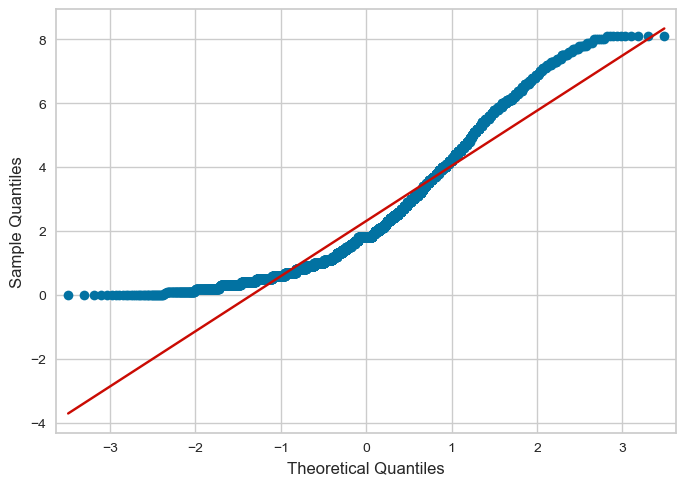

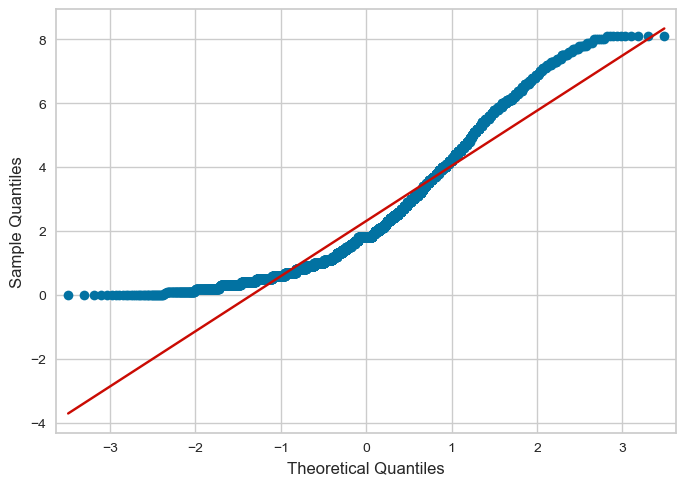

In [43]:
sm.qqplot(df['saturatedfat_100g'], line = "r")

nous pouvons voir qu'il y a un écart remarquable par rapport à la ligne le long des extrémités de queue, ce qui pourrait indiquer que les données ne sont pas distribuées normalement.

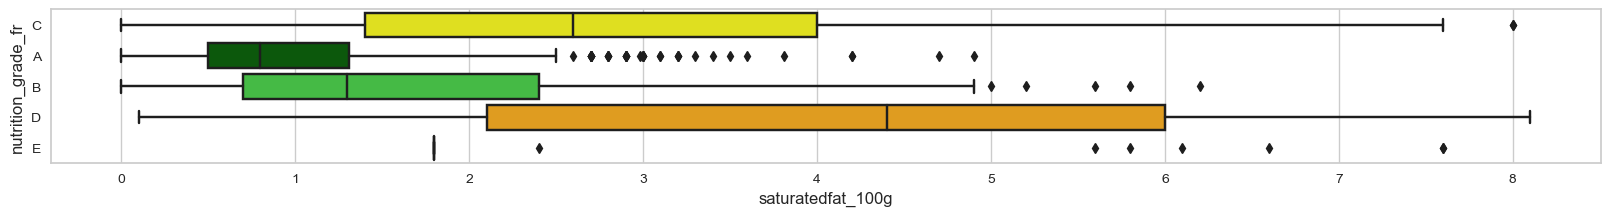

In [44]:
colors={'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'}
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x='saturatedfat_100g', y='nutrition_grade_fr', data=df, palette=colors)

In [45]:
bartlett(df.saturatedfat_100g[df['nutrition_grade_fr'] == 'A'],
        df.saturatedfat_100g[df['nutrition_grade_fr'] == 'B'],
        df.saturatedfat_100g[df['nutrition_grade_fr'] == 'C'],
        df.saturatedfat_100g[df['nutrition_grade_fr'] == 'D'],
        df.saturatedfat_100g[df['nutrition_grade_fr'] == 'E'],)

BartlettResult(statistic=910.6448580986436, pvalue=8.227225342451701e-196)

Interprétation du test bartlett:

Ce test utilise les hypothèses nulles et alternatives suivantes :

    H0 :Les variances sont identiques.
    Ha :Au moins l'une des variances est différente d'une autre.

Si la pvalue est inférieure à un certain niveau de signification (α = 0,05), nous pouvons alors rejeter l'hypothèse nulle et conclure que tous les groupes n'ont pas la même variance.

Etant donné que la p-value calculée est inférieure au niveau de signification (α = 0,05), on doit rejeter l'hypothèse nulle H0,et retenir l'hypothèse alternative Ha.

Il n'est donc pas conseillé de réaliser une **ANOVA** car les résultats ne seraient pas fiables.

In [46]:
model = ols('saturatedfat_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,5215.019552,4.0,640.670332,0.0
Residual,8447.225144,4151.0,NaN,NaN


 On a p-valeur est trop faible , on rejette H0 et ce rejet est significatif. On peut donc affirmer, avec un faible risque de se tromper, qu’au moins deux moyennes diffèrent.

Autrement dit,Il y a une influence du saturated-fat_100g sur nutrition_grade_fr, et cette influence est significative.


## ACP

In [47]:
Y=df['nutrition_grade_fr']
Y

0       C
1       A
2       B
3       C
4       C
       ..
4151    B
4152    D
4153    B
4154    C
4155    B
Name: nutrition_grade_fr, Length: 4156, dtype: object

In [48]:
# normaliser les données

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scal=scaler.fit_transform(X)

In [49]:
pca_columns = ['PC' + str(c) for c in range(1, X_scal.shape[1]+1, 1)]
X_scaled = pd.DataFrame(X_scal, index=X.index, columns=pca_columns)
X_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.182251,1.462638,0.487316,0.810434,0.779017,0.664623,0.608959,0.561860,0.561849,1.181719
1,-1.482073,-1.117389,-1.056995,-0.893377,-0.388042,0.415064,-1.548628,-0.710188,-0.710167,-1.650124
2,-0.545502,-0.484552,0.211546,0.017688,0.195487,0.415064,-0.592735,-0.710188,-0.710167,-0.436477
3,-0.650317,-0.800970,-1.277611,0.372649,0.487252,0.581437,-1.057026,1.502827,1.502793,-0.031928
4,-1.806661,-1.823245,-1.277611,-0.964369,0.268429,-0.915922,-1.412072,-0.164195,-0.164187,1.181719
...,...,...,...,...,...,...,...,...,...,...
4151,-1.935144,-1.579846,-0.946687,-1.165514,-0.898630,-0.250429,-1.685184,-0.783956,-0.783932,-0.234202
4152,0.377544,0.878481,0.377008,-0.360936,-0.533924,-0.915922,1.155183,2.594814,2.594752,1.788543
4153,-0.914045,-1.652866,-1.167303,-0.704065,-1.263336,-0.583175,1.947209,0.271438,0.271435,-0.638751
4154,1.412168,1.754716,0.542470,-1.520474,-0.388042,1.579676,0.390469,0.532818,0.532808,0.777170


Les valeurs nutritionnelles sont ramenées à la même échelle après une normalisation centrée-réduite. La moyenne d’expression de chaque valeur nutritionnelle est égale à 0 et l'écart type est égal à 1.

### Calcul de l'ACP

In [50]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [51]:
pca_columns = ['PC' + str(c) for c in range(1, X_pca.shape[1]+1, 1)] # création d'une liste avec les noms de colonnes de PC1 à PC50
X_pca = pd.DataFrame(X_pca, index=X.index, columns=pca_columns) # création du dataframe
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.463975,0.220558,0.910621,0.232527,0.559933,0.128074,0.465889,0.536053,-0.202727,0.000037
1,-3.276450,0.651786,-0.364344,-0.151224,0.193527,-0.138297,0.366825,-0.549318,0.068753,-0.000009
2,-1.202684,-0.004700,0.676341,-0.263398,0.417477,-0.138235,-0.324005,-0.258470,-0.001873,0.000010
3,-0.037576,2.685519,-1.159888,-0.452952,0.035484,-0.414436,0.297340,0.083837,-0.117993,-0.000059
4,-2.002682,0.651725,-1.394356,-2.280557,-0.244127,-0.048608,-0.503536,1.250234,-0.215850,-0.000051


In [52]:
pca.explained_variance_ratio_

array([4.16121713e-01, 1.40762092e-01, 1.13021714e-01, 9.67205200e-02,
       8.66378179e-02, 5.94837009e-02, 4.69720665e-02, 2.35305387e-02,
       1.67497850e-02, 5.18324822e-08])

In [53]:
explained_variance = pd.Series(dict(zip(X_pca.columns, 100.0*pca.explained_variance_ratio_)))
explained_variance

PC1     41.612171
PC2     14.076209
PC3     11.302171
PC4      9.672052
PC5      8.663782
PC6      5.948370
PC7      4.697207
PC8      2.353054
PC9      1.674979
PC10     0.000005
dtype: float64

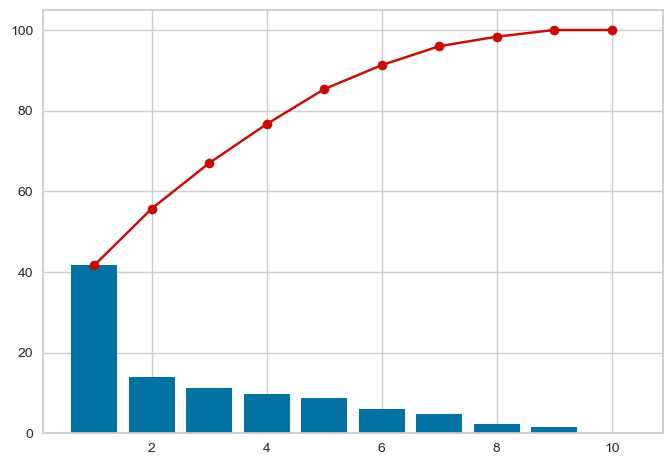

In [54]:
Nutr_values = np.arange(pca.n_components_)+1
y = explained_variance
x=Nutr_values
ycum = np.cumsum(y)
plt.bar(x, explained_variance, linewidth=2)
plt.plot(x,ycum,"-r",marker='o')
plt.show()

In [55]:
explained_variance['PC1'] + explained_variance['PC2'] + explained_variance['PC3']+ explained_variance['PC4']

76.66260390927587

Les 4 premières composantes de l'ACP expliquent **76.7%** de la variance.

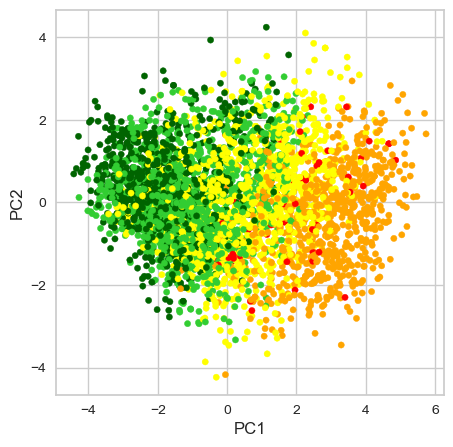

In [56]:
dict_colors = {'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'} 
Y_colors = [dict_colors[i] for i in Y]
X_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color=Y_colors);

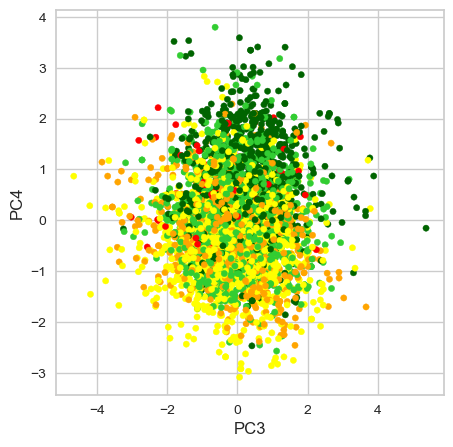

In [57]:
dict_colors = {'E':'red','D':'orange','C':'yellow' ,'A':'darkgreen','B':'Limegreen'} 
Y_colors = [dict_colors[i] for i in Y]
X_pca.plot(x='PC3', y='PC4', kind='scatter', figsize=(5, 5), color=Y_colors);

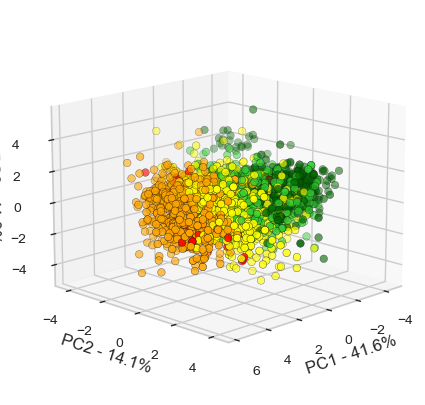

In [58]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], marker='o', s=30, edgecolor='k', facecolor=Y_colors)
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']))
ax.view_init(elev=15, azim=45)

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4) 
pca.fit(X_scaled) 
pca.components_

array([[ 0.40836382,  0.35959956,  0.30625069,  0.28657956,  0.13965127,
        -0.10682498,  0.28565042,  0.36884188,  0.36883719,  0.37870092],
       [-0.09471907, -0.28120405, -0.38607801,  0.24844306,  0.42322614,
         0.40257472, -0.19620444,  0.38602934,  0.38604018, -0.15311361],
       [ 0.26968122,  0.1503929 ,  0.08886825,  0.44318296,  0.47879072,
         0.28412513,  0.00159305, -0.43758367, -0.43758978, -0.08608633],
       [ 0.20839882,  0.10225719, -0.11374068, -0.01346487, -0.42756471,
         0.5128181 ,  0.56007965,  0.03766825,  0.03763628, -0.41313022]])

In [60]:
df_pca_comp = pd.DataFrame(data = pca.components_, columns = X.columns, index = ['CP1', 'CP2', 'CP3','CP4']) 
df_pca_comp

,energy_100g,fat_100g,saturatedfat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_100g
CP1,0.408364,0.359600,0.306251,0.286580,0.139651,-0.106825,0.285650,0.368842,0.368837,0.378701
CP2,-0.094719,-0.281204,-0.386078,0.248443,0.423226,0.402575,-0.196204,0.386029,0.386040,-0.153114
CP3,0.269681,0.150393,0.088868,0.443183,0.478791,0.284125,0.001593,-0.437584,-0.437590,-0.086086
CP4,0.208399,0.102257,-0.113741,-0.013465,-0.427565,0.512818,0.560080,0.037668,0.037636,-0.413130


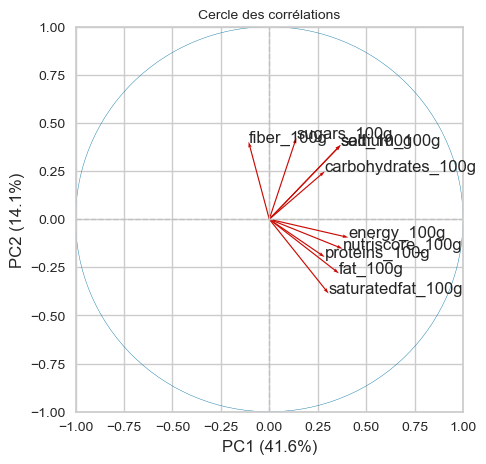

In [61]:
fig = plt.subplots(figsize=(5,5))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(df_pca_comp.shape[1]), np.zeros(df_pca_comp.shape[1]),
           df_pca_comp.iloc[0,:], df_pca_comp.iloc[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(df_pca_comp.iloc[0, :], df_pca_comp.iloc[1, :])):
    plt.text(x, y, X.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=10)
plt.xlabel('PC{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('PC{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.savefig("cercle_correlation.png")
plt.show()

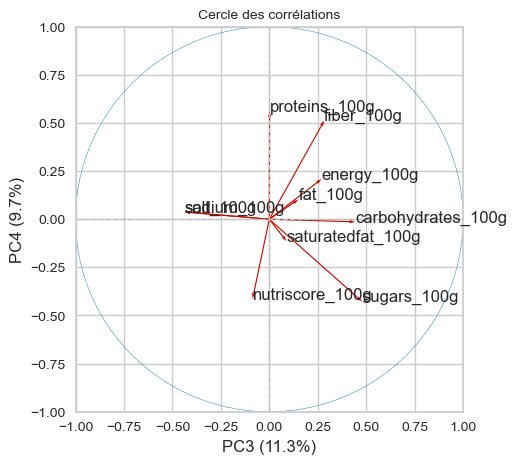

In [62]:
fig = plt.subplots(figsize=(5,5))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(df_pca_comp.shape[1]), np.zeros(df_pca_comp.shape[1]),
           df_pca_comp.iloc[2,:], df_pca_comp.iloc[3,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(df_pca_comp.iloc[2, :], df_pca_comp.iloc[3, :])):
    plt.text(x, y, X.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=10)
plt.xlabel('PC{} ({}%)'.format(3, round(100*pca.explained_variance_ratio_[2],1)))
plt.ylabel('PC{} ({}%)'.format(4, round(100*pca.explained_variance_ratio_[3],1)))

plt.savefig("cercle_correlation.png")
plt.show()

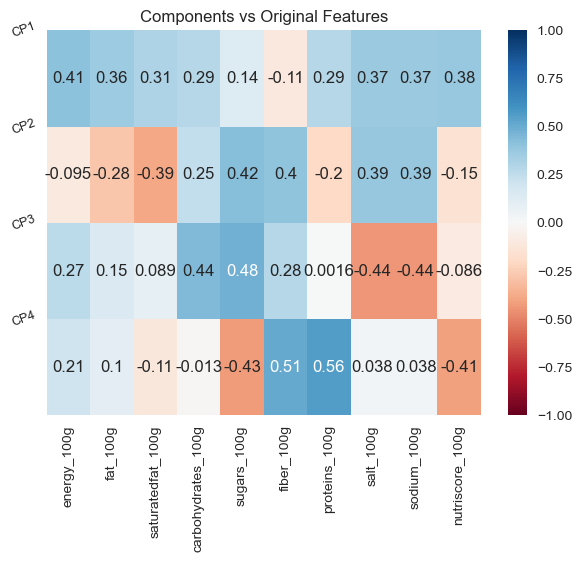

In [63]:
plt.figure(figsize=(7,5))
sns.heatmap(df_pca_comp,vmin = -1, vmax = 1,cmap = 'RdBu',annot = True)
plt.yticks([0,1,2,3], ['CP1', 'CP2','CP3','CP4'],rotation = 20,fontsize = 9)
plt.title('Components vs Original Features',fontsize = 12)
plt.show()

     PC1 est fortement corrélée avec 5 des variables originales. PC1 augmente avec l'augmentation des scores des: energy, 
    fat, carbohydrates, sel, sodium. Cela suggère que ces cinq critères varient ensemble.
    Si l'un augmente, les autres ont tendance à augmenter également.

    PC2 est positivement corrélé avec saturated-fat  négativement avec: sugar, fiber, sel, sodium .

    PC3 est positivement corrélé avec : sugars ainsi que carbohydrates et et négativement avec: sel, sodium .
    
    PC4 est fortement corrélée fiber et les proteins